In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## build autoencoder

In [2]:
# This is the size of our encoded representations (latent space)
encoding_dim = 8  # 8 floats -> compression of factor 98, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## load and prepare data

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## train autoencoder

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.4486 - val_loss: 0.2530
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2404 - val_loss: 0.2079
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2042 - val_loss: 0.1898
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1882 - val_loss: 0.1814
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1816 - val_loss: 0.1784
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1793 - val_loss: 0.1763
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1773 - val_loss: 0.1748
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1760 - val_loss: 0.1735
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1746 - val_loss: 0.1723
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1736 - val_loss: 0.1713

## get reconstructed data (unseen samples)

In [8]:
# Encode some digits
encoded_imgs = encoder.predict(x_test)

# Decode some digits
decoded_imgs = decoder.predict(encoded_imgs)

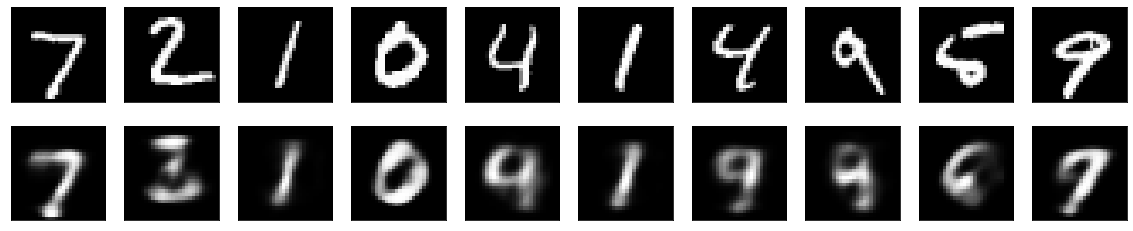

In [9]:
columns = 10
plt.figure(figsize=(20, 4))
for i in range(columns):
    
    # Display original input
    ax = plt.subplot(2, columns, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed input
    ax = plt.subplot(2, columns, i + 1 + columns)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()